#Lista 02 questão 02

Considere o conjunto de dados disponível em vehicle.csv, organizado em 19 co-
lunas, sendo as 18 primeiras colunas os atributos e a última coluna a saída. Os 18

atributos caracterizam a silhueta de veículos, extraídos pelo método HIPS (Hi-
erarchical Image Processing System). A tarefa consiste em classicar o veículo

em 4 classes (bus, opel, saab, e van). Maiores detalhes sobre os dados podem
ser conferidos em https://www.openml.org/search?type=data&sort=runs&
id=54.


a) Considerando uma validação cruzada em 10 folds, avalie modelos de clas-
sicação multiclasse nos dados em questão. Para tanto, use as abordagens


b) Para cada modelo criado, reporte valor médio e desvio padrão da acurácia
global e da acurácia por classe.

 Regressão softmax (treinado com GD ou SGD);

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
link = '/content/drive/MyDrive/UFC_mestrado/Sigaa_UFC/1_semestre/aprendizagem_automatica/lista_02_ama/vehicle.csv'

In [3]:
# Bibliotecas

# Tratamento de dados
import pandas as pd
import numpy as np

# no modelo Naive Bayes Gaussiano vai existir valores muito grande expoente e pontencias então esta bilioteca para melhor tratamento
# e pontencias então esta bilioteca para melhor tratamento de dados muito grandes e pequenos para evitar overflow
# que ocorre quando os valores exponenciais calculados são muito grandes para serem representados em ponto flutuante.
from scipy.special import expit

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Tratamento de dados para separar treino, teste e normalização
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold


sns.set_palette("Accent")
sns.set_style("darkgrid")


In [4]:
df = pd.read_csv(link, header=None)

In [5]:
df.shape

(846, 19)

In [6]:
# Definindo o dados de entrada e dados de saída.
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [7]:
X.shape

(846, 18)

In [8]:
y.shape

(846,)

In [9]:
y.unique()

array([3., 2., 0., 1.])

In [10]:
# Normalizando os dados

scaler = MinMaxScaler()
X_normalizando = scaler.fit_transform(X)

In [11]:
X_normalizando

array([[0.47826087, 0.57692308, 0.59722222, ..., 0.3902439 , 0.36666667,
        0.53333333],
       [0.39130435, 0.30769231, 0.61111111, ..., 0.34146341, 0.43333333,
        0.6       ],
       [0.67391304, 0.65384615, 0.91666667, ..., 0.2195122 , 0.4       ,
        0.5       ],
       ...,
       [0.7173913 , 0.80769231, 0.84722222, ..., 0.09756098, 0.36666667,
        0.66666667],
       [0.2826087 , 0.11538462, 0.52777778, ..., 0.6097561 , 0.46666667,
        0.46666667],
       [0.26086957, 0.11538462, 0.36111111, ..., 0.43902439, 0.33333333,
        0.3       ]])

In [12]:
# Definindo a validação cruzada com 10 folds

kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [69]:
#____________________________________________________________________________________________________________________________
# função métrica acurácia
def calcular_acuracia(y_verdadeiro, y_previsto):
    # Calcula o número de previsões corretas
    corretos = np.sum(y_verdadeiro == y_previsto)
    # Calcula o total de previsões
    total = len(y_verdadeiro)
    # Calcula a acurácia
    acuracia = corretos / total
    return acuracia

#____________________________________________________________________________________________________________________________
def calcular_desvio_padrao(x):
    desvios = np.sqrt(np.mean((x - np.mean(x, axis=0))**2, axis=0))
    return desvios

#____________________________________________________________________________________________________________________________

def calcular_media(x):
  media = np.mean(x, axis=0)
  return media

#____________________________________________________________________________________________________________________________
# Esta função tem como objetivo de calcular ao desvio padrão e a média de cada classe a partir da acurácia

def desvio_padrao_media_por_classe(scores_treino, scores_teste):

  # Calculando a média das pontuações de validação
  mean_score_treino = calcular_media(scores_treino)
  desvio_score_treino = calcular_desvio_padrao(scores_treino)

  print(f"Acurácia dos 10 folds de treino: ",[f'{score * 100:.2f}%' for score in scores_treino])
  print(f"Média global da Acurácia de validação dos dados de treino: {mean_score_treino * 100:.2f}%")
  print(f"Desvio Padrão global da Acurácia de validação dos dados de treino: {desvio_score_treino * 100:.2f}%")

  print('-'*50)

  mean_score_teste = calcular_media(scores_teste)
  desvio_score_teste = calcular_desvio_padrao(scores_teste)

  print(f"Acurácia dos 10 folds de teste: ",[f'{score * 100:.2f}%' for score in scores_teste])
  print(f"Média global da Acurácia de validação dos dados de teste: {mean_score_teste * 100:.2f}%")
  print(f"Desvio Padrão global da Acurácia de validação dos dados de teste: {desvio_score_teste* 100:.2f}%")


#____________________________________________________________________________________________________________________________
# Esta função tem como obejtivo de de criar um dataframe para mostrar acúraia de cada fold e a média entre elas como também o desvio padrão.

def scores_dataframe(scores_treino,scores_teste):
  # Passando para um DataFrame para poder exibir no gráfico
  dados_scores1 = pd.DataFrame(scores_treino)
  dados_scores2 = pd.DataFrame(scores_teste)

  resultado = pd.concat([dados_scores1 ,dados_scores2 ],axis=1)

  resultado.columns = ['Acuracia de Treino', 'Acuracia de Teste']

  return  (resultado * 100).round(2)

 #____________________________________________________________________________________________________________________________

 # criando uma função gráfico para visualizar os dados em gráfico

def grafico(dados, titulo):

  lista = list(range(1,dados.shape[0]+1))

  fig = px.line(dados,
                x=lista,  # Índice do DataFrame como eixo x
                y=dados.columns,  # Colunas do DataFrame como eixo y
                color_discrete_sequence=px.colors.qualitative.Dark24,  # Sequência de cores
                labels={'x': 'Índice', 'y': 'Valor'},  # Rótulos dos eixos
                title=f'{titulo}')

  # Atualização do layout do gráfico
  fig.update_layout(xaxis_title='Coluna de entrada X',  # Título do eixo x
                    yaxis_title='Valor',  # Título do eixo y
                    legend_title='Fold',  # Título da legenda
                    margin=dict(l=50, r=20, t=50, b=20),  # Define as margens
                    yaxis=dict(showgrid=True, zeroline=False),  # Exibir grade no eixo y
                    width=1300,  # Largura do gráfico
                    height=400)  # Altura do gráfico
  return fig

 #____________________________________________________________________________________________________________________________



#**Naive Bayes Gaussiano**

In [54]:
def Naive_Bayes_Gaussiano(X, y):
    y = y.astype(int)
    classe_priore = np.bincount(y) / len(y)
    classe_media = np.array([np.mean(X[y == i], axis=0) for i in range(len(np.unique(y)))])
    alpha = 1e-4  # Fator de regularização
    classe_covariancia = np.array([np.cov(X[y == i], rowvar=False) + alpha * np.eye(X.shape[1]) for i in range(len(np.unique(y)))])

    return classe_priore, classe_media, classe_covariancia

def prever_naive_bayes(X, classe_priore, classe_media, classe_covariancia):
    num_linhas, num_colunas = X.shape
    num_classes = len(classe_priore)
    posteriore = np.zeros((num_linhas, num_classes))

    for i in range(num_classes):
        priore = classe_priore[i]
        media = classe_media[i]
        cov = classe_covariancia[i]

        # Calcula a função de probabilidade verossimilhança
        cov_inv = np.linalg.inv(cov)
        exponent = np.dot((X - media), np.dot(cov_inv, (X - media).T)).diagonal()
        verossimilhanca = expit(-0.5 * exponent)

        # Ajusta a posteriori
        posteriore[:, i] = priore * np.prod(expit(1 / np.sqrt((2 * np.pi) ** num_colunas * np.linalg.det(cov))) * verossimilhanca[:, np.newaxis], axis=1)

    alpha_posteriori = 1e-6  # Fator de regularização para a posteriori
    posteriore += alpha_posteriori * np.ones(posteriore.shape)

    return np.argmax(posteriore, axis=1)


In [56]:
# Lista para armazenar as pontuações de validação de cada fold
scores_treino = []
scores_teste = []

salvando_y_previsto_de_cada_fold = []



# Loop sobre os folds
for treino_index, teste_index in kf.split(X_normalizando):
    X_treino, X_teste = X_normalizando[treino_index], X_normalizando[teste_index]
    y_treino, y_teste = y[treino_index], y[teste_index]

    # Treinando o modelo com os dados de treinamento e teste

    classe_priore, classe_media, classe_variancia = Naive_Bayes_Gaussiano(X_treino,y_treino)

    previsao_treino = prever_naive_bayes(X_treino, classe_priore, classe_media, classe_variancia)

    previsao_teste = prever_naive_bayes(X_teste, classe_priore, classe_media, classe_variancia)


    # Avaliando o modelo
    score = calcular_acuracia(y_treino, previsao_treino)
    scores_treino.append(score)

    score_do_teste = calcular_acuracia( y_teste, previsao_teste)
    scores_teste.append(score_do_teste)


desvio_padrao_media_por_classe(scores_treino, scores_teste)


Acurácia dos 10 folds de treino:  ['89.49%', '88.96%', '90.14%', '89.09%', '88.57%', '88.70%', '89.37%', '89.90%', '89.90%', '89.37%']
Média global da Acurácia de validação dos dados de treino: 89.35%
Desvio Padrão global da Acurácia de validação dos dados de treino: 0.50%
--------------------------------------------------
Acurácia dos 10 folds de teste:  ['84.71%', '88.24%', '81.18%', '80.00%', '83.53%', '85.88%', '91.67%', '83.33%', '77.38%', '82.14%']
Média global da Acurácia de validação dos dados de teste: 83.81%
Desvio Padrão global da Acurácia de validação dos dados de teste: 3.90%


In [71]:
# Resultados
scores_dataframe(scores_treino,scores_teste)


,Acuracia de Treino,Acuracia de Teste
0,73.06,75.29
1,72.14,72.94
2,73.32,72.94
3,71.35,75.29
4,71.62,70.59
5,69.91,78.82
6,70.34,65.48
7,73.10,61.90
8,73.10,59.52
9,71.52,69.05


In [72]:
grafico(scores_dataframe(scores_treino,scores_teste), 'Análise do discriminante Gaussiano')

# **Análise do discriminante Gaussiano**

In [57]:
def analise_discriminante_gaussiano(X_treino, y_treino):
    # Separar as classes
    classes = np.unique(y_treino)

    # Calcular médias e covariâncias de cada classe
    desvio_padrao = []
    media = []
    covariancia = []
    priore = []

    for c in classes:
        X_c = X_treino[y_treino == c]
        media.append(np.mean(X_c, axis=0))
        covariancia.append(np.cov(X_c.T))
        priore.append(len(X_c) / len(X_treino))
        desvio_padrao.append(np.std(X_c, axis=0))

    return media, covariancia, priore, classes, desvio_padrao

def previsoes(X_teste, media, covariancia, priore, classes):
    # Calcular as probabilidades posteriores para cada classe
    posteriores = []
    for i, c in enumerate(classes):
        prior = priore[i]
        mean = media[i]
        cov = covariancia[i]
        # Usando a fórmula da densidade de probabilidade gaussiana multivariada
        exponent = -0.5 * np.sum((X_teste - mean) @ np.linalg.inv(cov) * (X_teste - mean), axis=1)
        posterior = prior * np.exp(exponent) / np.sqrt(np.linalg.det(2 * np.pi * cov))
        posteriores.append(posterior)

    # Predizer a classe com a maior probabilidade posterior
    return classes[np.argmax(posteriores, axis=0)]


In [58]:
# # Lista para armazenar as pontuações de validação de cada fold
scores_treino = []
scores_teste = []

salvando_y_previsto_de_cada_fold = []

# Loop sobre os folds
for treino_index, teste_index in kf.split(X_normalizando):
    X_treino, X_teste = X_normalizando[treino_index], X_normalizando[teste_index]
    y_treino, y_teste = y[treino_index], y[teste_index]

    # Treinando o modelo com os dados de treinamento e teste

    media, covariancia, priore, classes, desvio_padrao = analise_discriminante_gaussiano(X_treino, y_treino)
    previsao_treino = previsoes(X_treino, media, covariancia, priore, classes)
    previsao_teste = previsoes(X_teste, media, covariancia, priore, classes)


    # Avaliando o modelo
    score = calcular_acuracia(y_treino, previsao_treino)
    scores_treino.append(score)

    score_do_teste = calcular_acuracia( y_teste, previsao_teste)
    scores_teste.append(score_do_teste)


desvio_padrao_media_por_classe(scores_treino, scores_teste)

Acurácia dos 10 folds de treino:  ['91.85%', '91.46%', '91.72%', '91.98%', '90.41%', '91.46%', '90.81%', '92.39%', '92.65%', '91.08%']
Média global da Acurácia de validação dos dados de treino: 91.58%
Desvio Padrão global da Acurácia de validação dos dados de treino: 0.66%
--------------------------------------------------
Acurácia dos 10 folds de teste:  ['87.06%', '88.24%', '85.88%', '84.71%', '87.06%', '87.06%', '88.10%', '84.52%', '78.57%', '82.14%']
Média global da Acurácia de validação dos dados de teste: 85.33%
Desvio Padrão global da Acurácia de validação dos dados de teste: 2.87%


In [73]:
# Resultados
scores_dataframe(scores_treino,scores_teste)

,Acuracia de Treino,Acuracia de Teste
0,73.06,75.29
1,72.14,72.94
2,73.32,72.94
3,71.35,75.29
4,71.62,70.59
5,69.91,78.82
6,70.34,65.48
7,73.10,61.90
8,73.10,59.52
9,71.52,69.05


In [ ]:
grafico(scores_dataframe(scores_treino,scores_teste), 'Análise do discriminante Gaussiano')

# **Regressão softmax**

In [59]:
# Para calcular a função de perda de entropia cruzada
def entropia_cruzada(y_verdadeiro, y_pred):
  return -np.mean(np.sum(y_verdadeiro * np.log(y_pred), axis=1))


def softmax(x):
    x = np.array(x)
    # Evita problemas de overflow e underflow
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)


def gradiente_softmax(matriz_x, y, taxa_de_aprendizagem, interacoes):

    # Adicionando coluna de 1s para o bias
    if np.all(matriz_x[:, 0] == 1):
        X = matriz_x
    else:
        # Adicionando a primeira coluna de 1s à matriz de características
        X = np.hstack((np.ones((matriz_x.shape[0], 1)), matriz_x))

    num_linha, num_coluna = X.shape
    num_classes = len(np.unique(y))

    # Inicializando os parâmetros
    theta_0 = np.random.randn(num_coluna, num_classes)
    theta_1 = np.zeros((1, num_classes))

    y_one_hot = np.eye(num_classes)[y.astype(int)]

    # Lista para armazenar os valores de perda em cada iteração
    perda = []

    # Gradiente Descendente
    for i in range(interacoes):

        # Calculando o modelo
        modelo = X.dot(theta_0) + theta_1
        y_pred = softmax(modelo)

        # Calculo do gradiente
        #dw = -(X.T.dot(y_one_hot - y_pred)) / num_linha
        dw = -np.dot(X.T, (y_one_hot - y_pred)) / num_linha
        db = -np.mean(y_one_hot - y_pred, axis=0)

        # Calculando a perda de entropia cruzada
        loss = entropia_cruzada(y_one_hot, y_pred)
        perda.append(loss)


        # Atualizando os parâmetros
        theta_0 = theta_0 - (taxa_de_aprendizagem * dw)
        theta_1 = theta_1 - (taxa_de_aprendizagem * db)

    return theta_0, theta_1, perda


def prever_softmax(matriz_x, theta_0, theta_1):

    # Adicionando coluna de 1s para o bias
    if np.all(matriz_x[:, 0] == 1):
        X = matriz_x
    else:
        # Adicionando a primeira coluna de 1s à matriz de características
        X = np.hstack((np.ones((matriz_x.shape[0], 1)), matriz_x))

    # Calculando o modelo final para os dados de teste
    modelo_final = X.dot(theta_0) + theta_1
    # Aplicando a função Softmax para obter as probabilidades finais
    y_pred_final = softmax(modelo_final)
    return np.argmax(y_pred_final, axis=1)


In [74]:
# Lista para armazenar as pontuações de validação de cada fold
scores_treino = []
scores_teste = []

salvando_y_previsto_de_cada_fold = []

y = np.array(y)


# Loop sobre os folds
for treino_index, teste_index in kf.split(X_normalizando):
    X_treino, X_teste = X_normalizando[treino_index], X_normalizando[teste_index]
    y_treino, y_teste = y[treino_index], y[teste_index]


    # Treinando o modelo com os dados de treinamento e teste

    theta_0, theta_1, custo = gradiente_softmax(X_treino, y_treino, 0.08, 6000)
    previsao_treino = prever_softmax(X_treino, theta_0, theta_1)
    previsao_teste = prever_softmax(X_teste, theta_0, theta_1)

    # Calcular a acurácia
    score = calcular_acuracia(y_treino, previsao_treino)
    scores_treino.append(score)

    score_do_teste = calcular_acuracia(y_teste, previsao_teste)
    scores_teste.append(score_do_teste)


desvio_padrao_media_por_classe(scores_treino, scores_teste)

Acurácia dos 10 folds de treino:  ['73.72%', '73.19%', '72.54%', '71.62%', '72.54%', '70.70%', '71.13%', '74.28%', '72.83%', '71.00%']
Média global da Acurácia de validação dos dados de treino: 72.35%
Desvio Padrão global da Acurácia de validação dos dados de treino: 1.15%
--------------------------------------------------
Acurácia dos 10 folds de teste:  ['74.12%', '72.94%', '74.12%', '77.65%', '68.24%', '80.00%', '67.86%', '63.10%', '61.90%', '70.24%']
Média global da Acurácia de validação dos dados de teste: 71.02%
Desvio Padrão global da Acurácia de validação dos dados de teste: 5.58%


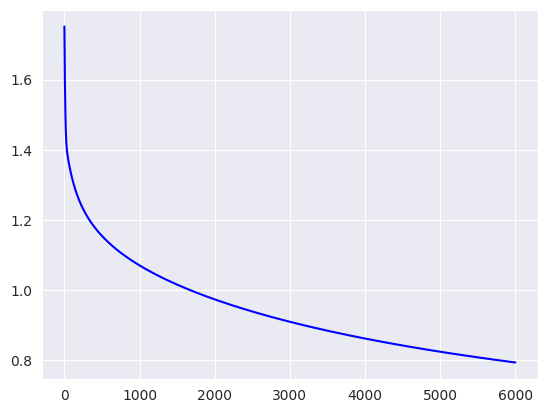

In [49]:
plt.plot(custo,'b')
plt.show()

In [75]:
# Resultados
scores_dataframe(scores_treino,scores_teste)

,Acuracia de Treino,Acuracia de Teste
0,73.72,74.12
1,73.19,72.94
2,72.54,74.12
3,71.62,77.65
4,72.54,68.24
5,70.70,80.00
6,71.13,67.86
7,74.28,63.10
8,72.83,61.90
9,71.00,70.24


In [ ]:
grafico(scores_dataframe(scores_treino,scores_teste), 'Análise do discriminante Gaussiano')